# Zonal Statistics - continuous values

If you are interested of NDVI mean by polygon for each date of a timeserie for instance.

In [1]:
import glob, os
import pandas as pd
import geopandas as gpd
import rasterio
import rasterio.plot
import rasterstats
from rasterstats import zonal_stats
import matplotlib.pyplot as plt
from pathlib import Path
import datetime
from IPython.display import display
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline
plotly.offline.init_notebook_mode()

print('All libraries successfully imported!')
print(f'Rasterstats : {rasterstats.__version__}')

All libraries successfully imported!
Rasterstats : 0.14.0


In [3]:
import warnings
warnings.filterwarnings("ignore")

print("BE CAREFULL warning are masked !!")

BE CAREFULL warning are masked !!


**Set parameters**

Choose statistics :
- min
- max
- mean

In [4]:
index_name = 'NDVI'

stat_name = 'mean'

nodata_val = -10000

start = '20200101'
end   = '20200601'

**Date**

The date must be in each image filename. `begin_date` is the first position of the date

E.g. : "SITE_3_**2**0181108_NDVI.tif" --> **begin_date = 8**

In [5]:
format     = '%Y%m%d' # format : YYYYMMDD
begin_date = 8

**Set directory**

In [6]:
computer_path = '/export/miro/ndeffense/LBRAT2104/'
computer_path = 'H:/ndeffense/LBRAT2104/'
grp_letter    = 'X'

# Directory for all work files
work_path = f'{computer_path}GROUP_{grp_letter}/WORK/'


# Rasters files directory
raster_file_list = sorted(glob.glob(f'{work_path}{index_name}/*{index_name}.tif'))

# Vector file
vector_file  = f'{work_path}IN_SITU/NAMUR_2020_IN_SITU_ROI.shp'

# Zonal statistics output
zonal_stat_path = f'{work_path}ZONAL_STATS/'
zonal_stat_csv  = f'{zonal_stat_path}zonal_stat_cont_{index_name}.csv'
zonal_stat_shp  = f'{zonal_stat_path}zonal_stat_cont_{index_name}.shp'

Path(zonal_stat_path).mkdir(parents=True, exist_ok=True)

**Check if raster and vector are projected to the same CRS**

In [7]:
gdf = gpd.read_file(vector_file)
src = rasterio.open(raster_file_list[0], "r")

crs_vector = str(gdf.crs).split(":",1)[1]
crs_raster = str(src.crs).split(":",1)[1]

if crs_vector == crs_raster:
    print(f'CRS are the same : EPSG:{crs_vector} = EPSG:{crs_raster}')
else:
    print('We must reproject vector file')

    gdf = gdf.to_crs(epsg=crs_raster)

CRS are the same : EPSG:32631 = EPSG:32631


**Check if raster and vector file are intersecting**

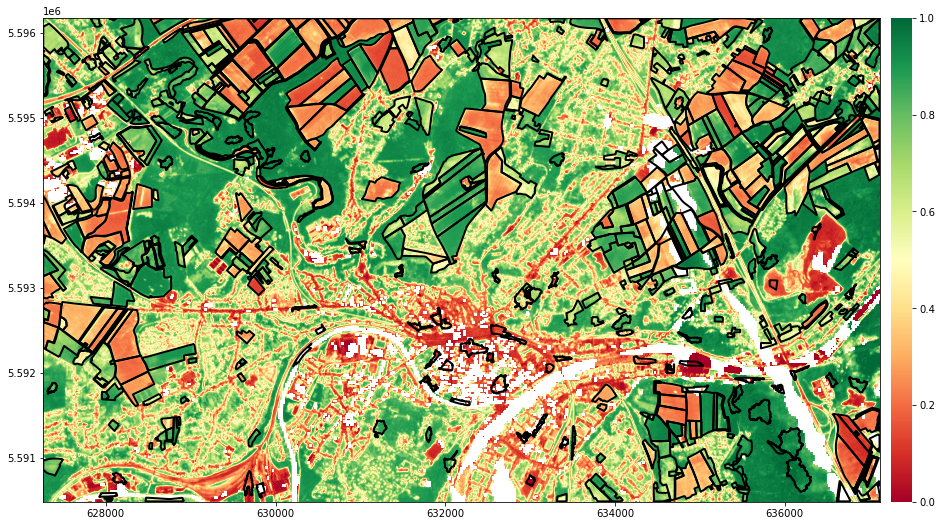

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))

# Plot vector
gdf.plot(facecolor='none', edgecolor='black', linewidth = 2, ax=ax)

# Plot image
color_map = plt.cm.get_cmap("RdYlGn")
reversed_color_map = color_map.reversed()

src = rasterio.open(raster_file_list[6], "r")
im_rio = rasterio.plot.show(src, cmap=color_map, vmin=0, vmax=1, ax=ax)
im_rio = im_rio.get_images()[0]

cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im_rio, ax=ax, cax=cax)


plt.box(False)

In [9]:
gdf["id"] = gdf.index

display(gdf)

id  lc_nb                     lc  grp_nb                    grp  \
0      0      3  Grassland and meadows      31  Grassland and meadows   
1      1      3  Grassland and meadows      31  Grassland and meadows   
2      2      3  Grassland and meadows      31  Grassland and meadows   
3      3      3  Grassland and meadows      31  Grassland and meadows   
4      4      3  Grassland and meadows      31  Grassland and meadows   
..   ...    ...                    ...     ...                    ...   
728  728      6                 Forest      69                 Forest   
729  729      6                 Forest      69                 Forest   
730  730      6                 Forest      69                 Forest   
731  731      7              Bare soil      72             Bare soils   
732  732      7              Bare soil      72             Bare soils   

     class_nb                  class  sub_nb                    sub  grp_1_nb  \
0         319  Grassland and meadows    3199  Grassland and meadows         3   
1         319  Grassland and meadows    3199  Grassland and meadows         3   
2         319  Grassland and meadows    3199  Grassland and meadows         3   
3         319  Grassland and meadows    3199  Grassland and meadows         3   
4         319  Grassland and meadows    3199  Grassland and meadows         3   
..        ...                    ...     ...                    ...       ...   
728       699                 Forest    6999                 Forest        69   
729       699                 Forest    6999                 Forest        69   
730       699                 Forest    6999                 Forest        69   
731       721             Bare soils    7211             Bare soils        72   
732       721             Bare soils    7211             Bare soils        72   

                     grp_1  grp_A_nb                  grp_A  \
0    Grassland and meadows         3  Grassland and meadows   
1    Grassland and meadows         3  Grassland and meadows   
2    Grassland and meadows         3  Grassland and meadows   
3    Grassland and meadows         3  Grassland and meadows   
4    Grassland and meadows         3  Grassland and meadows   
..                     ...       ...                    ...   
728                 Forest         6                 Forest   
729                 Forest         6                 Forest   
730                 Forest         6                 Forest   
731             Bare soils         7              Bare soil   
732             Bare soils         7              Bare soil   

                                              geometry  
0    POLYGON ((636106.223 5595512.196, 636122.069 5...  
1    POLYGON ((629761.504 5593158.472, 629780.378 5...  
2    POLYGON ((636735.316 5595728.754, 636750.328 5...  
3    POLYGON ((630113.339 5594270.350, 630101.635 5...  
4    POLYGON ((637115.003 5595823.427, 637115.003 5...  
..                                                 ...  
728  POLYGON ((628875.162 5595645.232, 628875.180 5...  
729  POLYGON ((632038.546 5595956.541, 632042.544 5...  
730  POLYGON ((635833.726 5596065.489, 635836.780 5...  
731  POLYGON ((636420.291 5593757.166, 636417.402 5...  
732  POLYGON ((635817.988 5593090.957, 635911.695 5...  

[733 rows x 14 columns]

**Get date of each image**

In [10]:
dict_list = []

for im in raster_file_list:
            
        date_str = os.path.basename(im)[begin_date-1:begin_date-1+8]

        date_im = datetime.datetime.strptime(date_str, format).date()

        dict_list.append({'date': date_im,
                            'im_path': im})

im_date_path_df = pd.DataFrame.from_dict(dict_list).sort_values('date')

display(im_date_path_df)

date                                            im_path
0   2020-01-16  H:/ndeffense/LBRAT2104/GROUP_X/WORK/NDVI\T31UF...
1   2020-02-12  H:/ndeffense/LBRAT2104/GROUP_X/WORK/NDVI\T31UF...
2   2020-03-16  H:/ndeffense/LBRAT2104/GROUP_X/WORK/NDVI\T31UF...
3   2020-04-17  H:/ndeffense/LBRAT2104/GROUP_X/WORK/NDVI\T31UF...
4   2020-05-20  H:/ndeffense/LBRAT2104/GROUP_X/WORK/NDVI\T31UF...
5   2020-06-21  H:/ndeffense/LBRAT2104/GROUP_X/WORK/NDVI\T31UF...
6   2020-07-19  H:/ndeffense/LBRAT2104/GROUP_X/WORK/NDVI\T31UF...
7   2020-08-13  H:/ndeffense/LBRAT2104/GROUP_X/WORK/NDVI\T31UF...
8   2020-09-14  H:/ndeffense/LBRAT2104/GROUP_X/WORK/NDVI\T31UF...
9   2020-10-19  H:/ndeffense/LBRAT2104/GROUP_X/WORK/NDVI\T31UF...
10  2020-11-18  H:/ndeffense/LBRAT2104/GROUP_X/WORK/NDVI\T31UF...
11  2020-12-18  H:/ndeffense/LBRAT2104/GROUP_X/WORK/NDVI\T31UF...

**Select images inside a period**

In [11]:
start_date = datetime.datetime.strptime(start, format).date()
end_date   = datetime.datetime.strptime(end, format).date()

mask = (im_date_path_df['date'] > start_date) & (im_date_path_df['date'] <= end_date)

im_date_path_df = im_date_path_df.loc[mask]

display(im_date_path_df)

date                                            im_path
0  2020-01-16  H:/ndeffense/LBRAT2104/GROUP_X/WORK/NDVI\T31UF...
1  2020-02-12  H:/ndeffense/LBRAT2104/GROUP_X/WORK/NDVI\T31UF...
2  2020-03-16  H:/ndeffense/LBRAT2104/GROUP_X/WORK/NDVI\T31UF...
3  2020-04-17  H:/ndeffense/LBRAT2104/GROUP_X/WORK/NDVI\T31UF...
4  2020-05-20  H:/ndeffense/LBRAT2104/GROUP_X/WORK/NDVI\T31UF...

## Compute zonal statistics

In [12]:
def mean_div_std(x):

    mean = np.mean(x)
    std  = np.std(x)

    result = mean / std

    return result

In [13]:
df_list = []
date_list = []

for i, row in im_date_path_df.iterrows():
    im_file    = row['im_path']
    long_date  = row['date']

    day   = str(long_date)[8:10]
    month = str(long_date)[5:7]
    year  = str(long_date)[0:4]
    
    print(long_date)

    date_list.append(long_date)

    date = day + month + year  # Year at the end because it will be truncated when saved to ESRI Shapefile

    # Open GeoTIFF file
    src = rasterio.open(im_file, 'r')
    im_arr = src.read(1)
    
    # Change NaN by "nodata_val"
    im_arr = np.nan_to_num(im_arr, nan=nodata_val)

    # Get transform from profile (metadata)
    profile = src.profile
    transform = profile['transform']
    
    src.close()

    df = pd.DataFrame(zonal_stats(gdf,
                                  im_arr,
                                  affine=transform,
                                  stats=['count','nodata','mean','std'],
                                  nodata=nodata_val,
                                  add_stats={'mean_div_std':mean_div_std}
                                  ))
    
    df = df.rename(columns={'count': f'valid_{date}','nodata': f'nan___{date}','mean': f'mean__{date}','std': f'std___{date}', 'mean_div_std':f'mDIVs_{date}'})

    df[f'nan___{date}'] = df[f'nan___{date}'].fillna(0)
    df = df.astype({f'nan___{date}': int, f'mDIVs_{date}': float})
    
    df_list.append(df)
    

dfs = pd.concat(df_list, axis=1).round(4)

display(dfs)


2020-01-16
2020-02-12
2020-03-16
2020-04-17
2020-05-20


mean__16012020  valid_16012020  std___16012020  nan___16012020  \
0            0.7395              25          0.0834               0   
1            0.7475              26          0.0380               0   
2            0.7392              26          0.1276               1   
3            0.6598              70          0.0600              18   
4            0.7268             208          0.0634               0   
..              ...             ...             ...             ...   
728             NaN               0             NaN              56   
729          0.5909              65          0.0865              71   
730          0.6248              45          0.0683              59   
731          0.2090              52          0.0713               0   
732          0.1907              75          0.0376               1   

     mDIVs_16012020  mean__12022020  valid_12022020  std___12022020  \
0            8.8643          0.1272               3          0.1198   
1           19.6801             NaN               0             NaN   
2            5.7916             NaN               0             NaN   
3           11.0008          0.6801              19          0.0407   
4           11.4695             NaN               0             NaN   
..              ...             ...             ...             ...   
728             NaN          0.3371              33          0.0269   
729          6.8274          0.1317               4          0.0358   
730          9.1492          0.2534              43          0.0603   
731          2.9304          0.1992              40          0.0735   
732          5.0693          0.2057              71          0.0631   

     nan___12022020  mDIVs_12022020  ...  mean__17042020  valid_17042020  \
0                22          1.0619  ...          0.8236              25   
1                26             NaN  ...          0.8128              26   
2                27             NaN  ...          0.5829               1   
3                69         16.6937  ...          0.8038              88   
4               208             NaN  ...          0.8004               5   
..              ...             ...  ...             ...             ...   
728              23         12.5295  ...          0.6364              37   
729             132          3.6768  ...          0.6402             136   
730              61          4.1994  ...             NaN               0   
731              12          2.7110  ...          0.1673              52   
732               5          3.2603  ...             NaN               0   

     std___17042020  nan___17042020  mDIVs_17042020  mean__20052020  \
0            0.0261               0         31.5377          0.6891   
1            0.0418               0         19.4493          0.7638   
2            0.0000              26             inf          0.5943   
3            0.0454               0         17.6858          0.8918   
4            0.0163             203         49.0806          0.5363   
..              ...             ...             ...             ...   
728          0.0393              19         16.1925          0.9057   
729          0.1434               0          4.4641          0.7913   
730             NaN             104             NaN          0.8734   
731          0.0712               0          2.3490          0.1392   
732             NaN              76             NaN          0.1336   

     valid_20052020  std___20052020  nan___20052020  mDIVs_20052020  
0                25          0.0390               0         17.6558  
1                26          0.0781               0          9.7800  
2                27          0.0663               0          8.9614  
3                88          0.0136               0         65.7186  
4               208          0.0934               0          5.7432  
..              ...             ...             ...             ...  
728              56          0.0143        

## Plot timeseries

In [14]:
df = dfs.filter(regex='mean')

display(df)

df['parcel_id'] = df.index

df = df.set_index('parcel_id')

df = df.transpose()

df['date'] = date_list


df = df.melt(id_vars=['date'], var_name='parcel_id')

df = df.merge(gdf, left_on='parcel_id', right_on='id')

df = df[['date','parcel_id','value','sub_nb','sub','class_nb','class']]

display(df)


mean__16012020  mean__12022020  mean__16032020  mean__17042020  \
0            0.7395          0.1272          0.8413          0.8236   
1            0.7475             NaN          0.7638          0.8128   
2            0.7392             NaN          0.7566          0.5829   
3            0.6598          0.6801          0.6979          0.8038   
4            0.7268             NaN          0.7962          0.8004   
..              ...             ...             ...             ...   
728             NaN          0.3371          0.5573          0.6364   
729          0.5909          0.1317          0.4802          0.6402   
730          0.6248          0.2534          0.5915             NaN   
731          0.2090          0.1992          0.1808          0.1673   
732          0.1907          0.2057          0.1596             NaN   

     mean__20052020  
0            0.6891  
1            0.7638  
2            0.5943  
3            0.8918  
4            0.5363  
..              ...  
728          0.9057  
729          0.7913  
730          0.8734  
731          0.1392  
732          0.1336  

[733 rows x 5 columns]

date parcel_id   value  sub_nb                    sub  class_nb  \
0     2020-01-16         0  0.7395    3199  Grassland and meadows       319   
1     2020-02-12         0  0.1272    3199  Grassland and meadows       319   
2     2020-03-16         0  0.8413    3199  Grassland and meadows       319   
3     2020-04-17         0  0.8236    3199  Grassland and meadows       319   
4     2020-05-20         0  0.6891    3199  Grassland and meadows       319   
...          ...       ...     ...     ...                    ...       ...   
3660  2020-01-16       732  0.1907    7211             Bare soils       721   
3661  2020-02-12       732  0.2057    7211             Bare soils       721   
3662  2020-03-16       732  0.1596    7211             Bare soils       721   
3663  2020-04-17       732     NaN    7211             Bare soils       721   
3664  2020-05-20       732  0.1336    7211             Bare soils       721   

                      class  
0     Grassland and meadows  
1     Grassland and meadows  
2     Grassland and meadows  
3     Grassland and meadows  
4     Grassland and meadows  
...                     ...  
3660             Bare soils  
3661             Bare soils  
3662             Bare soils  
3663             Bare soils  
3664             Bare soils  

[3665 rows x 7 columns]

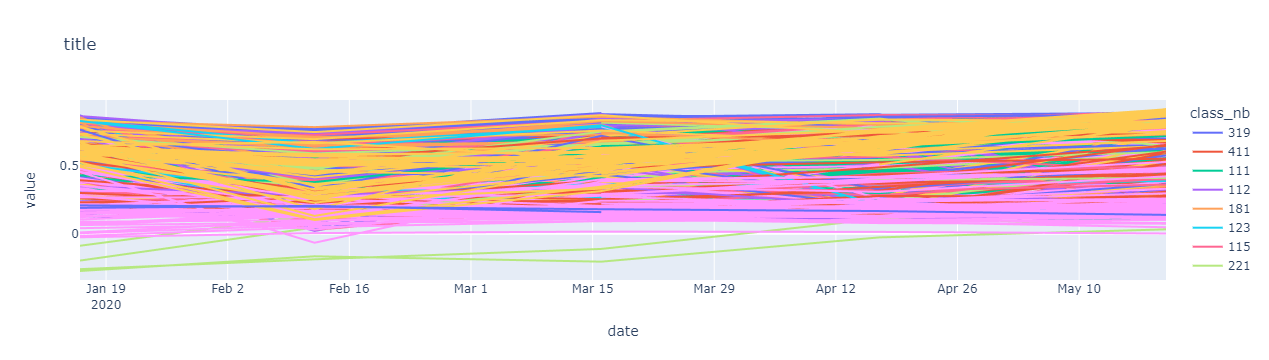

In [15]:
fig = px.line(df,
              x='date',
              y='value',
              color='class_nb',
              line_group='parcel_id',
              hover_data=['sub_nb','sub'],
              title= 'title')

fig.show()

**Write output to shapefile**

In [16]:
gdf_with_zonal_stat = pd.concat([gdf, dfs], axis=1, join="inner")

display(gdf_with_zonal_stat)

#gdf_with_zonal_stat.columns = gdf_with_zonal_stat.columns.astype(str)


gdf_with_zonal_stat.to_file(zonal_stat_shp)

print(f'SHP file was created : {zonal_stat_shp}')

id  lc_nb                     lc  grp_nb                    grp  \
0      0      3  Grassland and meadows      31  Grassland and meadows   
1      1      3  Grassland and meadows      31  Grassland and meadows   
2      2      3  Grassland and meadows      31  Grassland and meadows   
3      3      3  Grassland and meadows      31  Grassland and meadows   
4      4      3  Grassland and meadows      31  Grassland and meadows   
..   ...    ...                    ...     ...                    ...   
728  728      6                 Forest      69                 Forest   
729  729      6                 Forest      69                 Forest   
730  730      6                 Forest      69                 Forest   
731  731      7              Bare soil      72             Bare soils   
732  732      7              Bare soil      72             Bare soils   

     class_nb                  class  sub_nb                    sub  grp_1_nb  \
0         319  Grassland and meadows    3199  Grassland and meadows         3   
1         319  Grassland and meadows    3199  Grassland and meadows         3   
2         319  Grassland and meadows    3199  Grassland and meadows         3   
3         319  Grassland and meadows    3199  Grassland and meadows         3   
4         319  Grassland and meadows    3199  Grassland and meadows         3   
..        ...                    ...     ...                    ...       ...   
728       699                 Forest    6999                 Forest        69   
729       699                 Forest    6999                 Forest        69   
730       699                 Forest    6999                 Forest        69   
731       721             Bare soils    7211             Bare soils        72   
732       721             Bare soils    7211             Bare soils        72   

     ... mean__17042020  valid_17042020 std___17042020 nan___17042020  \
0    ...         0.8236              25         0.0261              0   
1    ...         0.8128              26         0.0418              0   
2    ...         0.5829               1         0.0000             26   
3    ...         0.8038              88         0.0454              0   
4    ...         0.8004               5         0.0163            203   
..   ...            ...             ...            ...            ...   
728  ...         0.6364              37         0.0393             19   
729  ...         0.6402             136         0.1434              0   
730  ...            NaN               0            NaN            104   
731  ...         0.1673              52         0.0712              0   
732  ...            NaN               0            NaN             76   

     mDIVs_17042020  mean__20052020  valid_20052020  std___20052020  \
0           31.5377          0.6891              25          0.0390   
1           19.4493          0.7638              26          0.0781   
2               inf          0.5943              27          0.0663   
3           17.6858          0.8918              88          0.0136   
4           49.0806          0.5363             208          0.0934   
..              ...             ...             ...             ...   
728         16.1925          0.9057              56          0.0143   
729          4.4641          0.7913             136          0.1429   
730             NaN          0.8734             104          0.0704   
731          2.3490          0.1392              52          0.0704   
732             NaN          0.1336              76          0.0117   

     nan___20052020  mDIVs_20052020  
0                 0         17.6558  
1                 0          9.7800  
2                 0          8.9614  
3                 0         65.7186  
4                 0          5.7432  
..              ...             ...  
728               0         63.3131  
729               0          5.5392  
730               0         12.4127  
731               0          1.9763  
732     

SHP file was created : H:/ndeffense/LBRAT2104/GROUP_X/WORK/ZONAL_STATS/zonal_stat_cont_NDVI.shp


**Write output to CSV**

In [14]:
gdf_with_zonal_stat = pd.concat([gdf, dfs], axis=1, join="inner")

gdf_with_zonal_stat = gdf_with_zonal_stat.drop(columns='geometry')

display(gdf_with_zonal_stat)

gdf_with_zonal_stat.to_csv(zonal_stat_csv)

print(f'CSV file was created : {zonal_stat_csv}')

id  lc_nb                     lc  grp_nb                    grp  \
0      0      3  Grassland and meadows      31  Grassland and meadows   
1      1      3  Grassland and meadows      31  Grassland and meadows   
2      2      3  Grassland and meadows      31  Grassland and meadows   
3      3      3  Grassland and meadows      31  Grassland and meadows   
4      4      3  Grassland and meadows      31  Grassland and meadows   
..   ...    ...                    ...     ...                    ...   
728  727      6                 Forest      69                 Forest   
729  730      6                 Forest      69                 Forest   
730  731      6                 Forest      69                 Forest   
731  711      7              Bare soil      72             Bare soils   
732  732      7              Bare soil      72             Bare soils   

     class_nb                  class  sub_nb                    sub  grp_1_nb  \
0         319  Grassland and meadows    3199  Grassland and meadows         3   
1         319  Grassland and meadows    3199  Grassland and meadows         3   
2         319  Grassland and meadows    3199  Grassland and meadows         3   
3         319  Grassland and meadows    3199  Grassland and meadows         3   
4         319  Grassland and meadows    3199  Grassland and meadows         3   
..        ...                    ...     ...                    ...       ...   
728       699                 Forest    6999                 Forest        69   
729       699                 Forest    6999                 Forest        69   
730       699                 Forest    6999                 Forest        69   
731       721             Bare soils    7211             Bare soils        72   
732       721             Bare soils    7211             Bare soils        72   

     ... mean__18112020  valid_18112020 std___18112020  nan___18112020  \
0    ...         0.7976              25         0.0516               0   
1    ...         0.7914              26         0.0376               0   
2    ...         0.6331              27         0.1587               0   
3    ...         0.6573              88         0.0958               0   
4    ...         0.8323             206         0.0724               2   
..   ...            ...             ...            ...             ...   
728  ...         0.6595              15         0.0514              41   
729  ...         0.6570             118         0.1176              18   
730  ...         0.6661              96         0.0597               8   
731  ...         0.2529              52         0.1161               0   
732  ...         0.2429              76         0.0557               0   

     mDIVs_18112020  mean__18122020  valid_18122020  std___18122020  \
0           15.4615          0.7610              25          0.0409   
1           21.0200          0.7185              26          0.0311   
2            3.9892          0.6759              26          0.1439   
3            6.8626          0.6309              62          0.0733   
4           11.5005          0.8127             204          0.0597   
..              ...             ...             ...             ...   
728         12.8283          0.5909               5          0.0741   
729          5.5887          0.5920              68          0.0652   
730         11.1671          0.6007              70          0.0541   
731          2.1778          0.2505              52          0.0940   
732          4.3587          0.2266              73          0.0577   

     nan___18122020  mDIVs_18122020  
0                 0         18.6177  
1                 0         23.0900  
2                 1          4.6973  
3                26          8.6033  
4                 4         13.6152  
..              ...             ...  
728              51          7.9720  
729              68          9.0778  
730              34         11.1064  
731               0          2.666

CSV file was created : /export/miro/ndeffense/LBRAT2104/GROUP_X/WORK/ZONAL_STATS/zonal_stat_cont_NDVI.csv
